In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

If you want to create the image pipeline with folder on your PC, please describe in cell below your folders route and don´t execute de Drive Section.

In [2]:
# Define the folder where the images are located
input_folder   = 'C:\\Users\\acdzapata\\Documents\\Personal\\Especialización\\ML 2\\input_folder'
output_folder= 'C:\\Users\\acdzapata\\Documents\\Personal\\Especialización\\ML 2\\output_folder'

### 1. Simulate any random rectangular matrix A.
* What is the rank and trace of A?
* What is the determinant of A?
* Can you invert A? How?
* How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?


In [3]:
import numpy as np

A = np.random.rand(4, 3) # Create a 4 x 3 matrix with random entries
A

array([[0.35301266, 0.34597169, 0.55877326],
       [0.11620285, 0.37168202, 0.1858766 ],
       [0.15878454, 0.16162591, 0.45653103],
       [0.04007178, 0.68709959, 0.79887142]])

Remember, than the rank of A is the number of linearly independent rows or columns in A. Since A is a rectangular matrix with dimensions 4 x 3, its rank cannot be greater than the minimum of its number of rows and columns, which is 3. However, the actual rank of A may be less than 3 depending on the values of its entries.

How A is a rectangular matrix, it does not have a trace.

In [4]:
rank_A = np.linalg.matrix_rank(A)
rank_A


3

The determinant only can be computer for square matrices.

Now, to Invert the matrix A, we can use the pseudoinverse to obtain a solution to a system of equation involving A.

The matrix A_inv is the pseudoinverse of A, and it satisfies the following properties:

If A has full rank (i.e., all its columns are linearly independent), then A_inv is the ordinary inverse of A. If A is rank-deficient (i.e., it has linearly dependent columns), then A_inv still provides a solution to a system of equations involving A, but it may not be unique.

In [5]:
A_inv = np.linalg.pinv(A)
A_inv

array([[ 2.56939299,  1.5917801 , -0.03783043, -2.14591731],
       [-0.13769904,  2.68735066, -1.78439356,  0.49076479],
       [-0.12584063, -2.26865916,  1.71622078,  0.88687488]])

The eigenvalues and eigenvectors of A’A and AA’ are related to each other through the singular value decomposition (SVD) of A.

If A = UΣV^T is the SVD of A, where U and V are orthogonal matrices and Σ is a diagonal matrix containing the singular values of A, then we can show that:

* AA’ = UΣ^2U^T, which means that AA’ and A’A have the same nonzero eigenvalues, which are the squares of the singular values of A. The eigenvectors of AA’ are the columns of U.
* A’A = VΣ^2V^T, which means that A’A and AA’ have the same nonzero eigenvalues, which are the squares of the singular values of A. The eigenvectors of A’A are the columns of V.

In [6]:
import numpy as np

U, S, V = np.linalg.svd(A)

print("U: \n", U,"\n")
print("S: \n", S,"\n")
print("V: \n",V,"\n") 

U: 
 [[-0.5080817  -0.66105684  0.30647796  0.4592691 ]
 [-0.2785575   0.24204332  0.79116332 -0.48773082]
 [-0.34388343 -0.43150319 -0.42970466 -0.71477485]
 [-0.73892009  0.56411336 -0.30900772  0.20071735]] 

S: 
 [1.40371181 0.31648062 0.20937767] 

V: 
 [[-0.21082794 -0.60027198 -0.77150835]
 [-0.79355987  0.56596249 -0.22349316]
 [ 0.57080147  0.56511946 -0.59567246]] 



In [7]:
AtA = A.T @ A  # Compute A'A
eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(AtA)
print("A'A: \n",AtA,"\n")
print("eigenvalues: \n",eigenvalues_AtA,"\n")
print("eigenvectors: \n", eigenvectors_AtA,"\n")

A'A: 
 [[0.16493932 0.2185199  0.3233557 ]
 [0.2185199  0.75607272 0.88509819]
 [0.3233557  0.88509819 1.19339379]] 

eigenvalues: 
 [1.97040684 0.10015998 0.04383901] 

eigenvectors: 
 [[-0.21082794 -0.79355987 -0.57080147]
 [-0.60027198  0.56596249 -0.56511946]
 [-0.77150835 -0.22349316  0.59567246]] 



In [8]:
AAt = A @ A.T  # Compute AA'
eigenvalues_AAt, eigenvectors_AAt = np.linalg.eig(AAt)
print("AA': \n",AAt,"\n")
print("eigenvalues: \n",eigenvalues_AAt,"\n")
print("eigenvectors: \n",eigenvectors_AAt,"\n")

AA': 
 [[0.5565419  0.27347541 0.36706827 0.69825084]
 [0.27347541 0.18620074 0.1633831  0.40853052]
 [0.36706827 0.1633831  0.25975605 0.48212547]
 [0.69825084 0.40853052 0.48212547 1.11190714]] 

eigenvalues: 
 [ 1.97040684e+00  1.00159980e-01 -2.67452378e-17  4.38390070e-02] 

eigenvectors: 
 [[-0.5080817  -0.66105684 -0.4592691  -0.30647796]
 [-0.2785575   0.24204332  0.48773082 -0.79116332]
 [-0.34388343 -0.43150319  0.71477485  0.42970466]
 [-0.73892009  0.56411336 -0.20071735  0.30900772]] 



Here are some interesting differences between AA’ and A’A:

* AA’ is always a square matrix, while A’A is not necessarily square.
* AA’ is symmetric, while A’A is not necessarily symmetric.
* The eigenvectors of AA’ and A’A may differ by a scalar multiple, but they will have the same direction.
* The singular values of A can be computed as the square root of the eigenvalues of AA’ or A’A. However, the singular values of are always nonnegative, while the eigenvalues of AA’ or A’A may have both positive and negative values.

### 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
* Edit your picture to be 256x256 pixels, grayscale (single channel)
* Plot your edited face
* Calculate and plot the average face of the cohort.
* How distant is your face from the average? How would you measure it?

In [9]:
from utils import Utils
utils = Utils() #initialized constructor

In [10]:
imgyo=utils.image_convert('Foto.jpg','','')
plt.imshow(imgyo, cmap='gray')
imgyo.shape

(256, 256)

#### Drive Section

In [11]:
# Google app authentication
gauth = GoogleAuth()
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=56953675736-99radcop7sq3pce1v269pq8b0famoi00.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [12]:
# Image directory
file = 'Imagen Processing'
path = os.path.abspath(file)
folder = os.path.dirname(path)
# input_folder = os.path.join(folder, 'input_folder')
# output_folder = os.path.join(folder, 'output_folder')

In [13]:
# Search the folder by name
folder_list = drive.ListFile({'q': "title='pictureFace' and mimeType='application/vnd.google-apps.folder' and trashed=false"}).GetList()
# Gets the folder ID
folder_id = folder_list[0]['id']

In [14]:
# Find the image files in the folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
for file in file_list:
    file.GetContentFile(os.path.join(input_folder, file['title']))

#### Average face image

In [16]:
# Load all the images into an array
images = []
for filename in os.listdir(input_folder):
    img=utils.image_convert(filename,input_folder,output_folder)
    plt.imshow(img)
    images.append(img)


# Calculate the average image
avg_img = np.mean(images, axis=0)

# Display the average image
plt.imshow(avg_img, cmap='gray')
plt.show()

In [17]:
# Calculate the Euclidean distance between my face and the average face
distance = np.linalg.norm(imgyo - avg_img)

#np.linalg.norm() calculates the norm of a givn vector or matrix.Remember 
#that the norm is a mathematical concept that measures the "size" or "magnitude" of a vector or matrix.

print(f'The distance between my face and the average face is {distance:.2f}')

The distance between my face and the average face is 21213.39


### 3. Let’s create the unsupervised Python package
* Same API as scikit-learn: fit(), fit_transform(), transform(), hyperparams at init
* Manage dependencies with Pipenv or Poetry.
* Implement SVD from scratch using Python and NumPy.
* Implement PCA from scratch using Python and NumPy.
* Implement t-SNE from scratch using Python and NumPy.

#### Let's start testing it with the wine dataset from sklearn Library

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [19]:
plot = plt.scatter(X[:,0], X[:,2], c=y)

plt.legend(handles=plot.legend_elements()[0], 
           labels=list(wine_data['target_names']))

plt.show()

##### myPCA for eigen method

In [20]:
# create a PCA object with 2 components
from model import myPCA
myPCA = myPCA(n_components=2)

myPca_eigen = myPCA
X_eigen=X.copy()
# fit the data
myPca_eigen.fit(X_eigen)

# transform the data using the PCA object
Xtransformedmyeigen= myPca_eigen.fit_transform(X_eigen)

print(Xtransformedmyeigen.shape)

(178, 2)


Plotting two random features of raw data

In [21]:
utils.plotv1(Xtransformedmyeigen,list(wine_data['target_names']),y)

PCA is sensitive to the scale!
Let's see if normalizing each feature by StandardScaler helps!

In [22]:
utils.plot_ss(X_eigen,2,"eigen",list(wine_data['target_names']),y)

##### myPCA for svd method

In [23]:
# create a PCA object with 2 components
from model import myPCA
myPCA = myPCA(n_components=2, method="svd")

myPca_svd = myPCA
X_svd=X.copy()
# fit the data
myPca_svd.fit(X_svd)

# transform the data using the PCA object
Xtransformedmysvd= myPca_svd.fit_transform(X_svd)

print(Xtransformedmysvd.shape)


(178, 2)


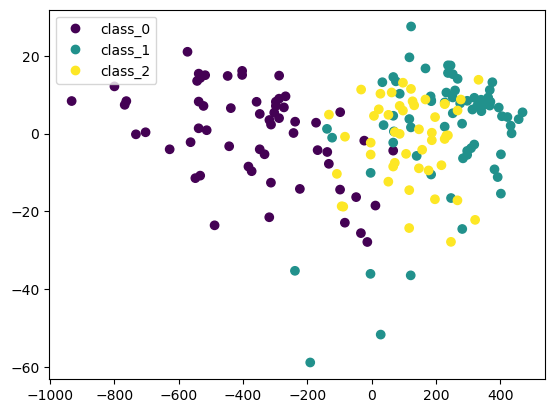

In [24]:
utils.plotv1(Xtransformedmysvd,list(wine_data['target_names']),y)

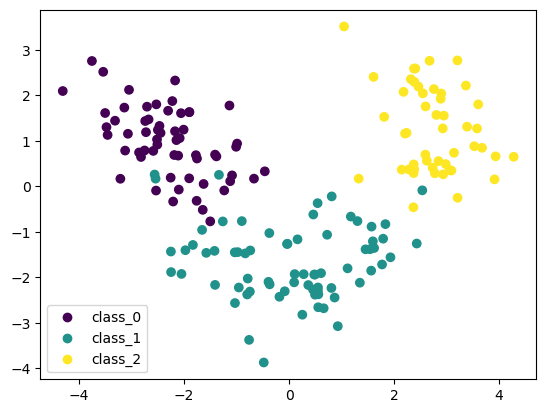

In [25]:
utils.plot_ss(X_svd,2,"svd",list(wine_data['target_names']),y)

### 4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

In [26]:
# create a PCA object with 2 components
from model import myPCA
myPCA = myPCA(n_components=256,method="svd")

# fit the data
myPCA.fit(imgyo)

# transform the data using the PCA object
imgyoreinvented = myPCA.fit_transform(imgyo)

# Reconstruct the image from the projected data
img_rec = myPCA.inverse_transform(imgyo,imgyoreinvented)

# reshape the reconstructed image back to 2D array
img_rec = img_rec.reshape(imgyo.shape)

print(img_rec.shape)

(256, 256)


Run de PCA for the 256 components, and later analys the explained variance for each one.

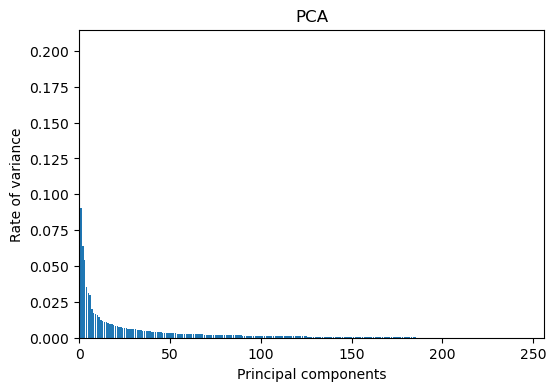

In [27]:
Var = myPCA.explained_variance_ratio() # the rate of variance of the components and generate the principal components

fig = plt.figure(figsize=(6,4))
plt.bar(np.arange(len(Var)), Var)
plt.xlabel('Principal components')
plt.ylabel('Rate of variance')
plt.title('PCA')
plt.xlim(0, len(Var))
plt.show()

In [28]:
componentsRate = pd.DataFrame(Var)
componentsRate = componentsRate.T

num_components = [10, 20, 30, 40, 50, 60, 70]
for n in num_components:
    var_rate = 100 * componentsRate.iloc[:, 0:n].sum(axis=1).values
    print(f"Variation rate detected for the first {n} components: {var_rate}")


Variation rate detected for the first 10 components: [56.36478268]
Variation rate detected for the first 20 components: [67.76608914]
Variation rate detected for the first 30 components: [74.84168455]
Variation rate detected for the first 40 components: [79.95544016]
Variation rate detected for the first 50 components: [83.7106075]
Variation rate detected for the first 60 components: [86.64923236]
Variation rate detected for the first 70 components: [89.04150563]


Now, with this data, and looking for a minimum number of components who could explain a relevant variance (for example 80%), i think that with the first 40 components  will be enough


In [29]:
# create a PCA object with 2 components
from model import myPCA
myPCA = myPCA(n_components=40,method="svd")

# fit the data
myPCA.fit(imgyo)

# transform the data using the PCA object
imgyoreinvented = myPCA.fit_transform(imgyo)

# Reconstruct the image from the projected data
img_rec = myPCA.inverse_transform(imgyo,imgyoreinvented)

# reshape the reconstructed image back to 2D array
img_rec = img_rec.reshape(imgyo.shape)

print(img_rec.shape)

(256, 256)


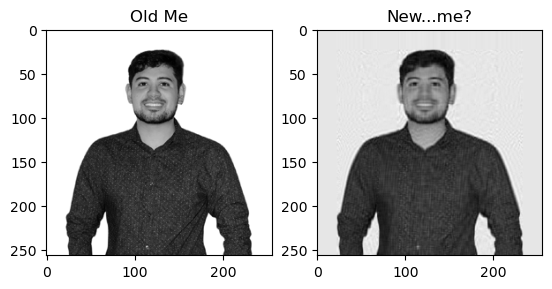

In [30]:
# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(imgyo, cmap='gray')
ax[0].set_title('Old Me')
ax[1].imshow(img_rec, cmap='gray')
ax[1].set_title('New...me?')
plt.show()

With 40 components we can achieve a good approximation

### 5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

In [31]:
mnist = fetch_openml('mnist_784')

In [32]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
mask = np.logical_or(y == 0, y == 8)
X = X[mask]
y = y[mask]

X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Test accuracy: %.2f%%' % (accuracy * 100))


Test accuracy: 99.45%


C:\Users\acdzapata\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The naive logistic regression have a great aproximation, with an accuracy of 99.42%

### 6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.
* Plot the 2 new features generated by your algorithm
* Does this somehow impact the performance of your model?


#### MNIST PCA eigen

In [33]:
# create a PCA object with 2 components
from model import myPCA
pca = myPCA(n_components=2)
X_eigenMN= X.copy()
# fit the data
pca.fit(X_eigenMN)

# transform the data using the PCA object
X_transformed_eigenMN = pca.fit_transform(X_eigenMN)

print(X_transformed_eigenMN.shape)

(13728, 2)


In [34]:
utils.plotv1(X_transformed_eigenMN,list(set(y)),y)

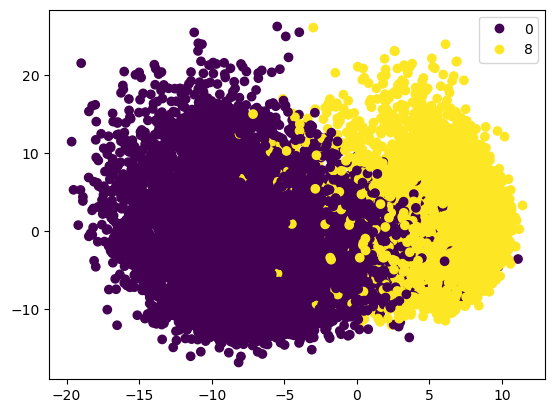

In [35]:
utils.plot_ss(X_eigenMN,2,"eigen",list(set(y)),y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_eigenMN, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - eigen : %.2f%%' % (accuracy * 100))

Test accuracy PCA - eigen : 95.45%


The performance is 4% lower under myPCA methods

#### MNIST PCA svd

In [37]:
# create a PCA object with 2 components
from model import myPCA
pca = myPCA(n_components=2,method="svd")
X_svdMN= X.copy()
# fit the data
pca.fit(X_svdMN)

# transform the data using the PCA object
X_transformed_svdMN = pca.fit_transform(X_svdMN)

In [38]:
utils.plotv1(X_transformed_svdMN,list(set(y)),y)

In [39]:
utils.plot_ss(X_svdMN,2,"svd",list(set(y)),y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_svdMN, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - svd : %.2f%%' % (accuracy * 100))

Test accuracy PCA - svd : 95.45%


With PCA under the method SVD, the accuracy computed is the equal to the baseline

### 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How differentare these results from those of your implementation? Why?

In [41]:
pca = PCA(n_components=2, svd_solver='full')
X_pca_sk= X.copy()

X_transformed_pca = pca.fit_transform(X_pca_sk)

print(X_transformed_pca.shape)

(13728, 2)


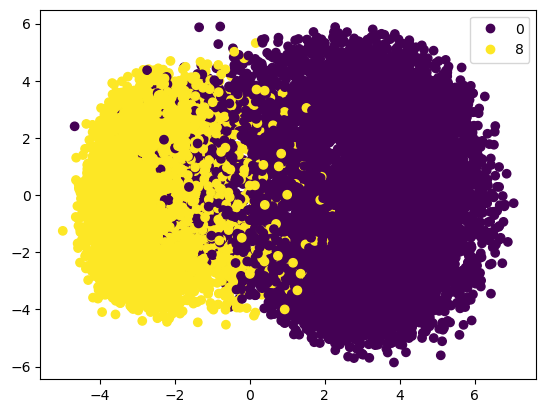

In [42]:
utils.plotv1(X_transformed_pca,list(set(y)),y)

In [43]:
# Normalise the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
scaler.fit(X_pca_sk)
X_normalised_pca_sk= scaler.fit_transform(X_pca_sk)

pca.fit(X_normalised_pca_sk)

# transform the data using the PCA object
X_transformed_pca_sk = pca.fit_transform(X_normalised_pca_sk)


plot = plt.scatter(X_transformed_pca_sk[:,0], X_transformed_pca_sk[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0], labels=list(set(y)))

plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_pca, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='none', solver='saga')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Test accuracy PCA - svd : %.2f%%' % (accuracy * 100))

Test accuracy PCA - svd : 95.45%


Its not difference between the result of PCA in Scikit-Learn and my implementation. The mathematical concepts are the same.

### 9 and 10 are en readme file